<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/9_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 Factor Analysis (FA) 개요

1) 상관 관계를 분석하여, 공통 차원을 통해 축약하는 통계
   기법 다수 변수들의 정보 손실을 최소화하여, 소수의 요인으로 축약

2) 공통된 요인이 여러개의 변수를 설명한다고 가정
3) 각 변수와 요인간 Factor Loading (요인 적재량)을 계산

### 🔹 Factor Analysis vs. PCA (주성분 분석)

#### 🎯 개요

| 비교 항목          |                          **Factor Analysis (FA)**                          |                          **Principal Component Analysis (PCA)**                          |
|--------------------|----------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **목적**          | 숨겨진 **공통 요인(Factor)** 을 찾기 위함                                  | 데이터의 분산을 최대한 보존하면서 **차원 축소**                                        |
|                  |                                                                            |                                                                                          |
| **데이터 모델링** | 관측 변수 = 공통 요인 + 고유 요인(오차 포함)                             | 주성분 = 데이터의 선형 결합                                                              |
|                  |                                                                            |                                                                                          |
| **공분산 설명**   | 공통 요인을 기준으로 분산을 설명                                         | 전체 분산을 최대한 유지                                                                  |
|                  |                                                                            |                                                                                          |
| **요인 수 결정**  | 주어진 데이터의 내재적인 구조를 기반으로 설정                           | Scree plot, 설명된 분산을 기반으로 선택                                                 |
|                  |                                                                            |                                                                                          |
| **해석 가능성**   | 해석이 용이, 심층적인 데이터 특성 발견 가능                             | 다소 해석이 어려울 수 있음                                                               |
                    |

#### 🎯 정리
- **FA는 "숨겨진 요인"을 찾고, PCA는 "데이터를 축소"하는 것이 목적**
- **FA는 가정(모델링)이 존재하고, PCA는 순수한 수학적 기법**
- **PCA는 전체 분산을 유지하지만, FA는 공통된 요인으로 설명되는 분산을 중점적으로 분석**


#### 🎯 EFA (탐색 요인 분석) VS CFA (확인 요인 분석)
       EFA : 변수가 어느 요인에 부합될지에 대한 가설이 없을때,
       CFA : 변수와 요인에 대한 특정 가설을 토대로 요인 분석 모델과 자료가 부합하는지 확인할 때

#### 🎯 효과
        여러개의 관련 있는 변수들이 하나의 요인으로 묶임 >>
        불필요한 변수 제거, 변수 특성 파악 (상호독립적 특징),
        요인점수를 이용한 변수 생성

In [31]:
#!pip install factor-analyzer

import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/bfi.csv", encoding='utf-8') # Assuming 'e' was intended for encoding


# 불필요한 컬럼 삭제
df1 = df.drop(columns = ['gender','education','age','rownames'], axis = 1).reset_index(drop = True)
df1.head(5)

df1.dropna(inplace = True)

#### 📌 KMO 검정
      데이터 세트의 요인을 평가
      관측된 모든 변수 간의 분산 비율을 추정
      0.6 미만의 KMO값은 부적절

In [21]:
from factor_analyzer.factor_analyzer import calculate_kmo
all, model = calculate_kmo(df1)
print(model)
print("""
KMO 값이 0.85로 요인 분석이 가능한 데이터로 확인된다.
""")

0.8486452309468383


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(




Eigent 값이 1 이상일때 까지 혹은 그래프의 기울기가 완만해지기 전까지 임으로 6개로 나눠주는 것이 적절




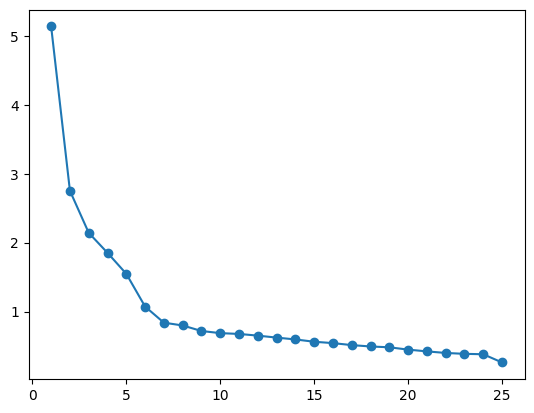

In [28]:
# 요인 수 선택

fa = FactorAnalyzer(n_factors= 5, rotation = None)
fa.fit(df1)

ev, v =fa.get_eigenvalues()
plt.scatter(range(1,df1.shape[1]+1),ev)
plt.plot(range(1, df1.shape[1]+1), ev)

print("""

Eigent 값이 1 이상일때 까지 혹은 그래프의 기울기가 완만해지기 전까지 임으로 6개로 나눠주는 것이 적절

""")

#### 📌 EFA

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

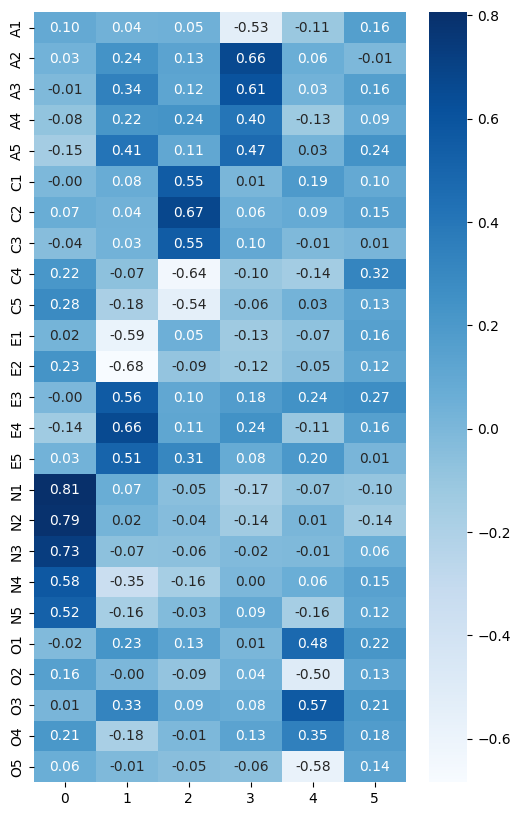

In [32]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax") #ml : 최대우도 방법
fa.fit(df1)
efa_result= pd.DataFrame(fa.loadings_, index=df1.columns)

plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

# 📌 0 번요인은 N1 ~ N5에 대해 높은 요인 적재량을 가짐
# 📌 1 번 요인은 E1 ~ E2에 대해 높은 요인 적재량을 가짐

In [34]:
fa = FactorAnalyzer(n_factors=5, rotation="varimax") #ml : 최대우도 방법 : varimax 를 사용하여 해석 가능성을 높임
fa.fit(df1)

fa.get_factor_variance()
df2 = pd.DataFrame(fa.get_factor_variance())

# SS Loadings = 요인별 고유값
# Proportion Var : 전체 분산에서 각 요인들이 설명하는 비율
# Cumulative Var : 누적된 분산 기여율

df2.index = ['SS Loadings', 'Proportion Var','Cumulative Var']
print(df2)
print("""
SS Loadings 는 각 요인이 얼마나 많은 변수를 설명하는지 나타낸다. 예를 들어, 첫번째 요인은 2.70만큼의 변수를 설명할 수 있다.
Proportion Var 는 각 요인들이 전체 데이터 세트를 설명하는 분산의 비율로 0은 10% , 1은 9.89%, 2는 8%의 분산을 설명한다.
Cumulative Var 는 누적 설명된 분산으로 총 5개의 요인이 전체 42.36%를 설명한다고 본다.
""")



                       0         1         2         3         4
SS Loadings     2.709633  2.473090  2.041106  1.844498  1.522153
Proportion Var  0.108385  0.098924  0.081644  0.073780  0.060886
Cumulative Var  0.108385  0.207309  0.288953  0.362733  0.423619

SS Loadings 는 각 요인이 얼마나 많은 변수를 설명하는지 나타낸다. 예를 들어, 첫번째 요인은 2.70만큼의 변수를 설명할 수 있다. 
Proportion Var 는 각 요인들이 전체 데이터 세트를 설명하는 분산의 비율로 0은 10% , 1은 9.89%, 2는 8%의 분산을 설명한다. 
Cumulative Var 는 누적 설명된 분산으로 총 5개의 요인이 전체 42.36%를 설명한다고 본다. 



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📌 신뢰도 계수(크론바흐 알파계수) 확인

    요인 분석은 변수들을 몇 개의 숨겨진 (latent)요인으로 그룹화 하는 기법
    이 요인들이 신뢰할 수 있는 확인하는 과정을 위해 크론바흐 알파계수 확인

In [41]:
# 📌 크론바흐 알파 계산 함수
def cronbach_alpha(df):
    item_variance = df.var(axis=0, ddof=1)  # 각 문항의 분산
    total_variance = df.sum(axis=1).var(ddof=1)  # 전체 점수의 분산
    num_items = df.shape[1]  # 문항 개수
    alpha = (num_items / (num_items - 1)) * (1 - (item_variance.sum() / total_variance))
    return alpha

# 크론바흐 알파 0.7 이상이면 신뢰할수 있는 척도
factors = ['A', 'C', 'E', 'N', 'O']
factors_items_dict = {}
for factor in factors:
    factors_items_dict[factor] = [x for x in df1.columns if x[0] == factor]


for key, value in factors_items_dict.items() :
  print(key, cronbach_alpha(df1[value]))
  print("")

A 0.4437533019387828

C -0.31628341382243547

E -0.6552429584732405

N 0.8169468842774008

O -0.1760981079376836



In [48]:
# 📌 핵심만 요약 접근 방법
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
s_df1 = ss.fit_transform(df1)
s_df1 = pd.DataFrame(s_df1, columns = df1.columns)


model = FactorAnalysis(n_components= 5)
model.fit(s_df1)

print(pd.DataFrame(model.components_, index = ['Latent%s'% i for i in range(1,6)]).iloc[:, :5])

print("""
1,2,4,0 의 변수 명들
Latent1: 4번 변수와 가장 강한 음의 관계를 가짐 # Make people feel at ease. - 사회성
Latent2: 1, 2, 4번 변수와 중간 정도 음의 관계  # Am indifferent to the feelings of others, Inquire about others' well-being ,
         Make people feel at ease - 책임감
Latent5: 0번 변수와 비교적 높은 양의 관계 # Am indifferent to the feelings of others - 자기 표현
여러 개의 변수가 사회성, 자기표현, 책임감이라는 핵심 요인으로 묶인다.
""")

                0         1         2         3         4
Latent1  0.228468 -0.398003 -0.464894 -0.387640 -0.547986
Latent2  0.035511 -0.352801 -0.398974 -0.208195 -0.294737
Latent3  0.115389 -0.134516 -0.211524 -0.066552 -0.240288
Latent4 -0.001970  0.113695  0.103821  0.269863  0.050609
Latent5  0.329675 -0.331385 -0.316255 -0.199613 -0.207292

1,2,4,0 의 변수 명들 
Latent1: 4번 변수와 가장 강한 음의 관계를 가짐 # Make people feel at ease. - 사회성 
Latent2: 1, 2, 4번 변수와 중간 정도 음의 관계  # Am indifferent to the feelings of others, Inquire about others' well-being ,
         Make people feel at ease - 책임감
Latent5: 0번 변수와 비교적 높은 양의 관계 # Am indifferent to the feelings of others - 자기 표현 
여러 개의 변수가 사회성, 자기표현, 책임감이라는 핵심 요인으로 묶인다.

